# Demand over the year

In [15]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from ipywidgets import *
from IPython.display import display
from IPython.display import Image
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.size"] = 14
import pgeocode

plt.style.use("ggplot")
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import scipy.stats as stats

# from pygeocoder import Geocoder
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [19]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

per_year_df = pd.DataFrame(index=pd.date_range('2018-01-01','2018-12-31').map(lambda x: x.strftime("%m-%d")))
def add_city_to_per_year_df(city_name, value_counts_per_day, per_year_df):
    years = value_counts_per_day.index.map(lambda x: x.strftime("%Y")).unique()
    date_value_counts_per_year = {}
    for year in years:
        date_value_counts_per_year[year] = value_counts_per_day.filter(
            like=year
        ).sort_index()
        date_value_counts_per_year[year].index = date_value_counts_per_year[
            year
        ].index.map(lambda x: x.strftime("%m-%d"))
        per_year_df = pd.merge(
            per_year_df,
            date_value_counts_per_year[year],
            left_index=True,
            right_index=True,
            how="left",
            sort=False,
        )
        per_year_df.columns = [*per_year_df.columns[:-1], f"{city_name}_{year}"]
    return per_year_df


def plot_years_for_city(city_name, per_year_df):
    city_columns = [column for column in per_year_df if column.startswith(city_name)]
#     per_year_df[city_columns].apply(
#         lambda x: savgol_filter(x / np.mean(x), 41, 3)
#     ).plot(title=f"{city_name} smoothened demand over the year for 3 different years")
    per_year_df[city_columns].apply(lambda x: x / np.mean(x)).plot(
        title=f"{city_name} demand over the year for {len(city_columns)} different years",
    figsize=(18,6))

### Austin

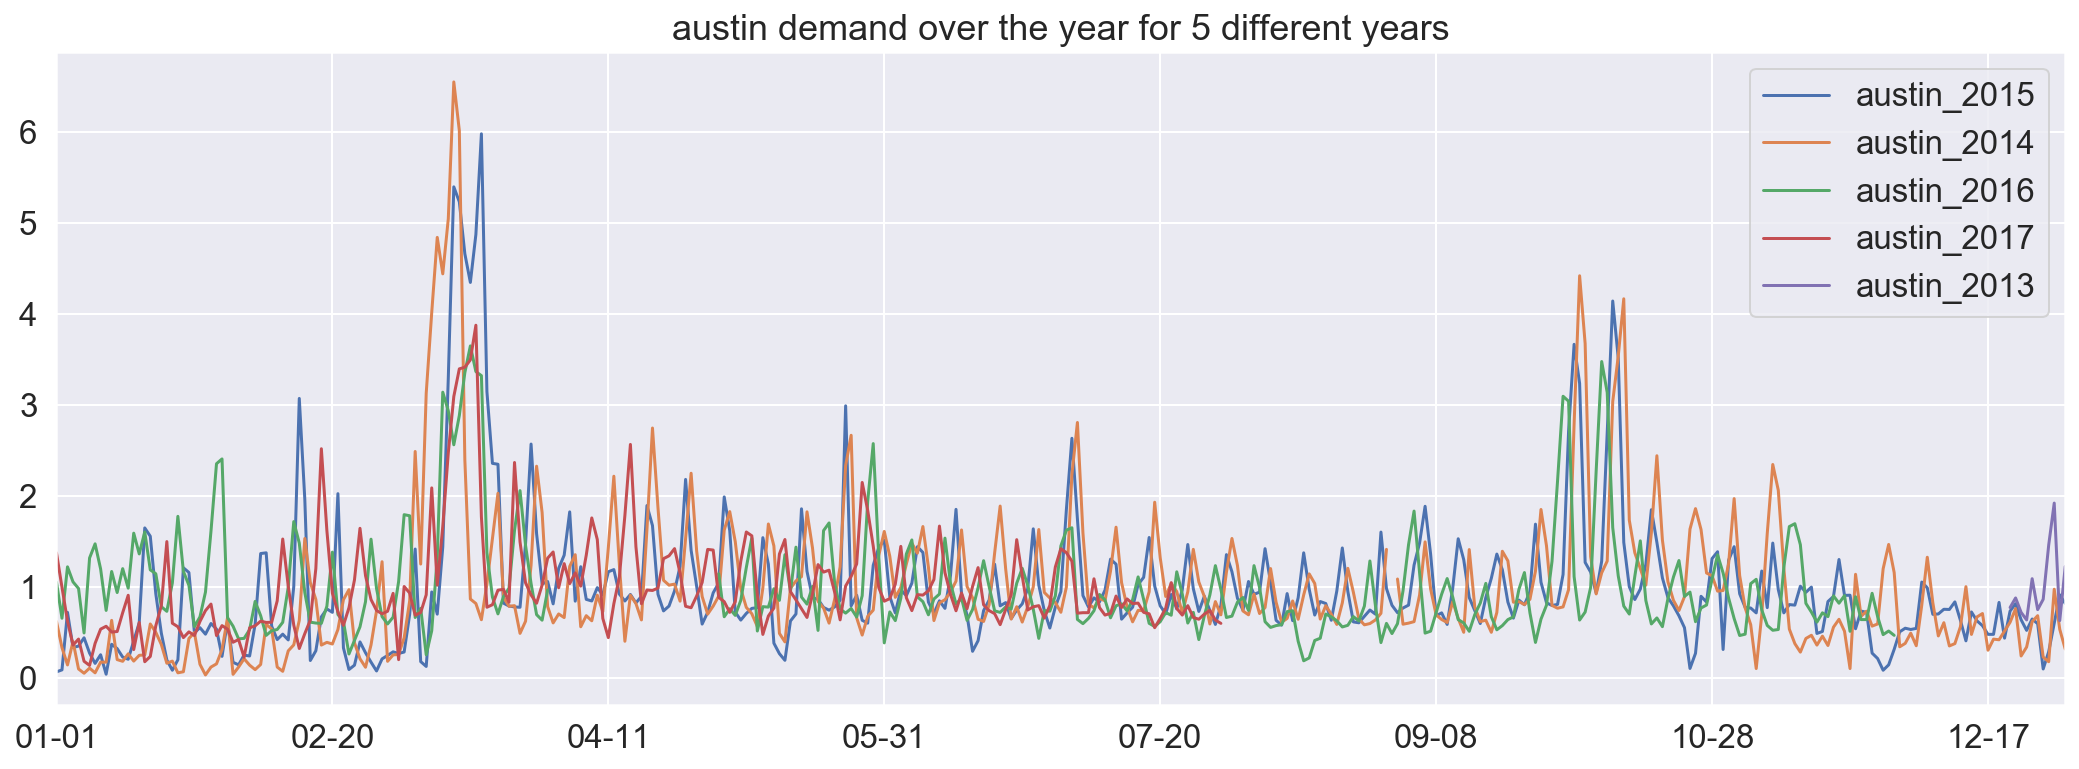

In [20]:
austin_trips_df = pd.read_pickle("../pickled_data/austin_df.pickled")

austin_value_counts_per_day = austin_trips_df.start_time.dt.date.value_counts()
per_year_df = add_city_to_per_year_df('austin', austin_value_counts_per_day, per_year_df)

plot_years_for_city('austin', per_year_df)

In [17]:
austin_trips_df.head()

,bikeid,checkout_time,duration_minutes,end_station_name,start_station_name,start_time,subscriber_type,trip_id,Start_Day,Month
0,8.0,19:12:00,41,Trinity & 6th Street,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,Thursday,March
1,141.0,2:06:04,6,South Congress & Academy,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,Sunday,October
2,578.0,16:28:27,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,Friday,March
3,555.0,15:12:00,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,Sunday,November
4,86.0,15:39:13,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,Sunday,April


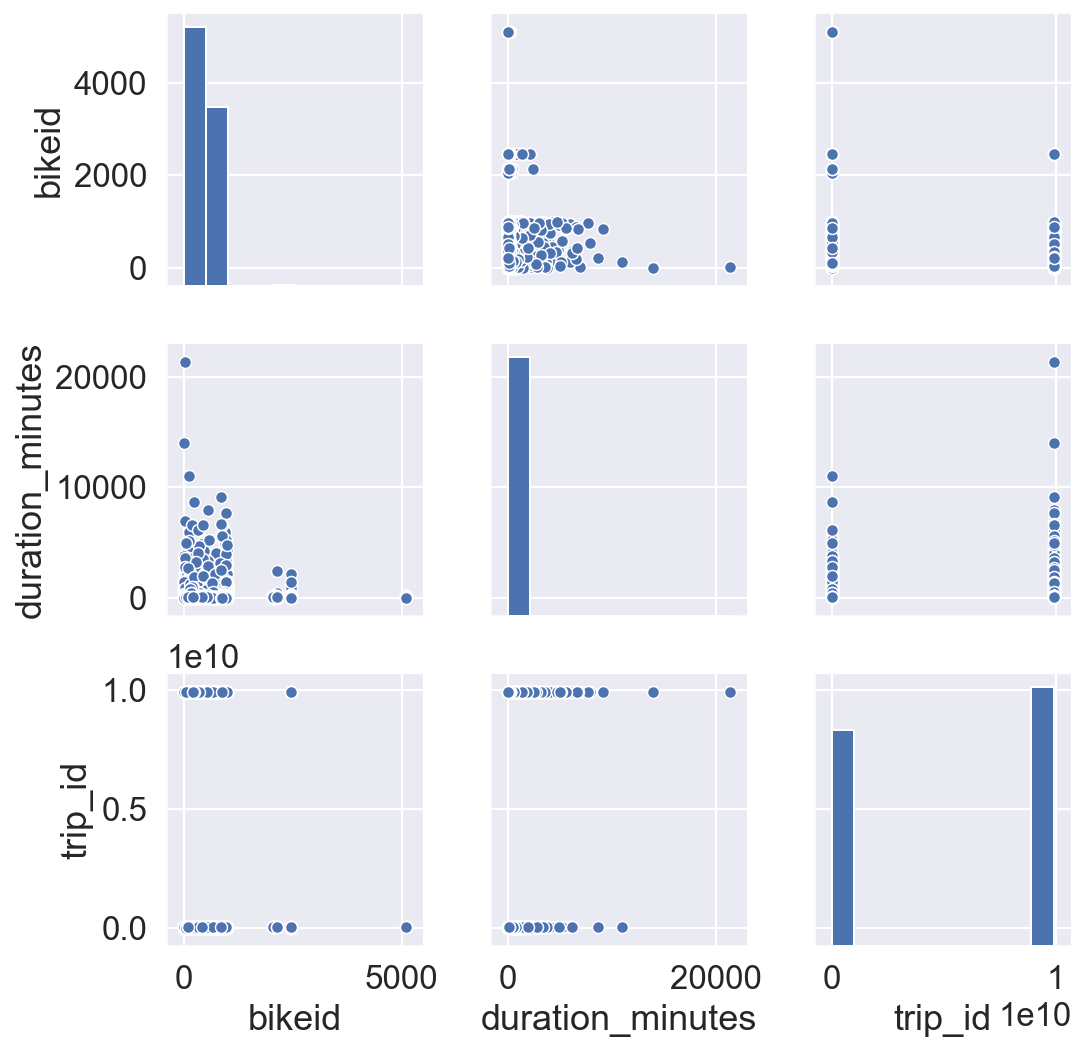

In [16]:
sns.pairplot(austin_trips_df);

### London

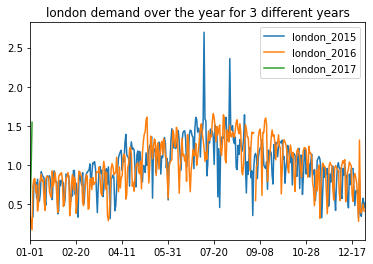

In [3]:
london_trips_df = pd.read_pickle("../pickled_data/london_counts_df.pickled")
ldn_counts_per_day = (
    london_trips_df["cnt"].groupby([london_trips_df["timestamp"].dt.date]).sum()
)
per_year_df = add_city_to_per_year_df('london', ldn_counts_per_day, per_year_df)
plot_years_for_city('london', per_year_df)

In [13]:
london_trips_df
london_trips_df.groupby([london_trips_df["timestamp"].dt.year, london_trips_df["timestamp"].dt.month]).sum()

cnt            t1            t2       hum  \
timestamp timestamp                                                  
2015      1           546639   4101.000000   2255.500000  51005.00   
          2           543594   3721.500000   1868.000000  51950.00   
          3           695934   6093.500000   4558.500000  51832.25   
          4           831582   7873.000000   7112.500000  48468.00   
          5           895413  10091.500000   9803.500000  47939.00   
          6          1033252  12151.500000  12073.000000  44371.50   
          7          1120687  14107.000000  14060.000000  46632.50   
          8          1033951  13830.500000  13816.500000  51913.50   
          9           892478  10371.000000  10357.500000  52002.00   
          10          865046   9474.000000   9321.500000  57887.00   
          11          677332   8259.500000   7605.000000  56344.50   
          12          602838   9000.500000   8660.000000  56448.50   
2016      1           582518   5459.500000   3872.000000  58230.50   
          2           592910   4695.500000   3033.000000  49847.00   
          3           656527   5344.000000   3684.500000  53722.50   
          4           768845   6804.500000   5708.500000  48643.50   
          5          1001935  10663.000000  10537.500000  50815.50   
          6           933878  11602.500000  11578.500000  53668.50   
          7          1165527  14467.000000  14453.500000  48719.50   
          8          1137314  14699.000000  14686.500000  47944.00   
          9           998619  12813.000000  12800.000000  48022.00   
          10          935706   9363.333333   9239.833333  56942.00   
          11          703859   5827.000000   4499.500000  56243.00   
          12          651908   5967.500000   4925.000000  63803.50   
2017      1            37680    339.000000    114.000000   6071.50   

                       wind_speed  weather_code  is_holiday  is_weekend  \
timestamp timestamp                                                       
2015      1          12502.000000        2211.0         0.0       192.0   
          2           9873.500000        2409.0         0.0       192.0   
          3          12938.250000        1940.0         0.0       215.0   
          4          10988.500000        1642.0        48.0       191.0   
          5          14268.500000        1900.0        48.0       240.0   
          6          12398.000000        1457.0         0.0       192.0   
          7          13067.000000        1710.0         0.0       192.0   
          8          10326.000000        1948.0        24.0       240.0   
          9           9394.000000        1683.0         0.0       185.0   
          10          8671.166667        2078.0         0.0       215.0   
          11         14191.000000        2418.0         0.0       216.0   
          12         15452.500000        2367.0        48.0       188.0   
2016      1          12996.500000        2424.0        24.0       240.0   
          2          13058.500000        2054.0         0.0       190.0   
          3          11778.000000        2177.0        48.0       177.0   
          4          11067.000000        1901.0         0.0       216.0   
          5          11001.500000        1852.0        48.0       216.0   
          6           9745.000000        2204.0         0.0       192.0   
          7          11847.000000        1619.0         0.0       239.0   
          8          11860.500000        1511.0        24.0       192.0   
          9           9580.000000        1622.0         0.0       180.0   
          10          9328.666667        1919.0         0.0       239.0   
          11         10499.000000        2128.0         0.0       191.0   
          12          9216.500000        2005.0        48.0       216.0   
2017      1           1061.500000         235.0        24.0        24.0   

                     season  hum_binary  
timestamp timestamp                      
2015      1          201

### San Francisco

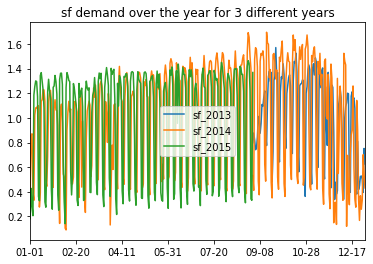

In [4]:
sf_trips_df = pd.read_pickle("../pickled_data/sf_trips_df.pickled")
sf_counts_per_day = sf_trips_df.groupby([sf_trips_df["start_date"].dt.date]).count()["start_date"]
per_year_df = add_city_to_per_year_df('sf', sf_counts_per_day, per_year_df)
plot_years_for_city('sf', per_year_df)

### DC

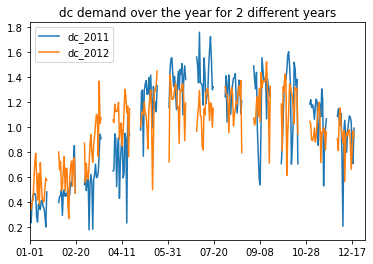

In [5]:
dc_trips_df = pd.read_pickle("../pickled_data/DC_df.pickled")

dc_counts_per_day = dc_trips_df.groupby([dc_trips_df["datetime"].dt.date]).sum()[
    "count"
]
per_year_df = add_city_to_per_year_df('dc', dc_counts_per_day, per_year_df)
plot_years_for_city('dc', per_year_df)

### Chicago

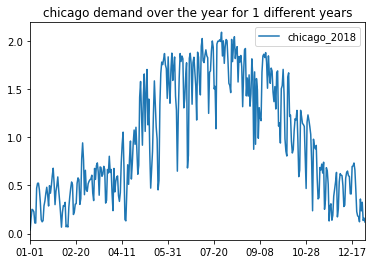

In [6]:
chicago_trips_df = pd.read_pickle("../pickled_data/chicago_trips_df.pickled")
chicago_counts_per_day = chicago_trips_df.groupby([chicago_trips_df["start_time"].dt.date]).count()['start_time']
per_year_df = add_city_to_per_year_df('chicago', chicago_counts_per_day, per_year_df)
plot_years_for_city('chicago', per_year_df)

In [7]:
per_year_df.head()

,austin_2015,austin_2014,austin_2016,austin_2017,austin_2013,london_2015,london_2016,london_2017,sf_2013,sf_2014,sf_2015,dc_2011,dc_2012,chicago_2018
01-01,36,267.0,640.0,786.0,NaN,NaN,9797.0,6421.0,NaN,359,181.0,985.0,2294.0,376
01-02,47,144.0,400.0,570.0,NaN,NaN,7195.0,11823.0,NaN,767,428.0,801.0,1951.0,1637
01-03,366,63.0,742.0,359.0,NaN,NaN,4869.0,19436.0,NaN,779,283.0,1349.0,2236.0,2493
01-04,171,173.0,642.0,208.0,NaN,9234.0,20533.0,NaN,NaN,356,206.0,1562.0,2368.0,2416
01-05,179,44.0,598.0,246.0,NaN,20372.0,22805.0,NaN,NaN,296,1186.0,1600.0,3272.0,2228


In [8]:
per_year_df.shape

(365, 14)